<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%207%20Introduction%20to%20Well-Test%20Analysis/notebook/7_examples_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 7 Introduction to Well-Test Analysis (Part 1)**

The **Part 1** of **Unit 7** notebook contains **4 of 6 flow test types** (Chap 7.2, 7.3, 7.4, and 7.5)

The overall types of well-test types are:
* Constant-Rate Flow Tests (Chap 7.2)
* Multirate Flow Tests (Chap 7.3)
* Constant-Pressure Flow Tests (Chap 7.4)
* Constant-Rate Pressure Buildup Tests (Chap 7.5)
* Multirate Buildup Tests (Chap 7.6)
* Buildup Analysis of Finite-Acting Wells (Chap 7.7)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
!git clone https://www.github.com/yohanesnuwara/reservoir-engineering

Cloning into 'reservoir-engineering'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (170/170), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 530 (delta 65), reused 0 (delta 0), pack-reused 360
Receiving objects: 100% (530/530), 1.26 MiB | 12.51 MiB/s, done.
Resolving deltas: 100% (219/219), done.


## **Chap 7.2 Constant-Rate Flow Tests**

### Example 7.1 Analysis of a Constant-Rate Well Test

Text(0, 0.5, 'Pressure (psia)')

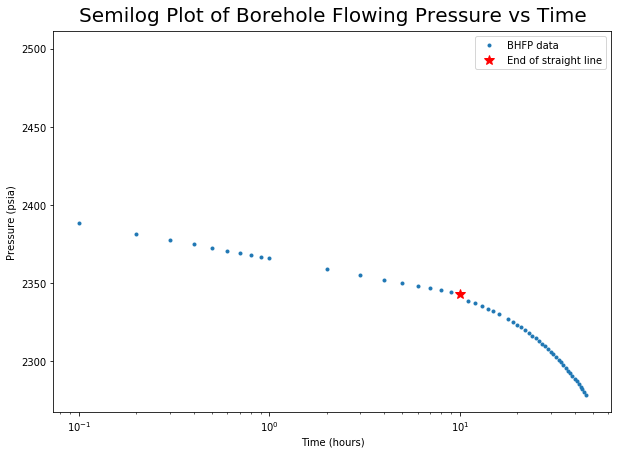

In [0]:
data_bhfp = pd.read_csv('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/data/Table 7.2-Reservoir Parameters and BHFP Example 7.1.csv')

axisx = data_bhfp.t
axisy = data_bhfp.p

"guess time index in time data that mark the end of straight line for regression (Fig 7.1 in book)"
index = 19 # continuously adjust this value until it reaches the point

# plot borehole flowing pressure vs time
plt.figure(figsize=(10, 7))
p1 = plt.semilogx(axisx, axisy, '.')

# plot the guessed 'end of straight' line for regression
p2 = plt.semilogx(data_bhfp.t[index], data_bhfp.p[index], '*', color='r', ms=10)
plt.legend((p1[0], p2[0]), ('BHFP data', 'End of straight line'))

plt.title('Semilog Plot of Borehole Flowing Pressure vs Time', size=20, pad=10)
plt.xlabel('Time (hours)'); plt.ylabel('Pressure (psia)')

To do regression we cut the dataframe from `df[0]` until the index of our guessed *end of straight line* `df[index]`. Only if the BHFP data contains pressure at `time = 0` (first row), drop the first row `df[0]`, because when log operation is underway, `log(0) = indefinite`. 

In [0]:
# cut dataframe from index 0 to index of end of straight line
df1 = data_bhfp.iloc[:index+1, :]

# drop the first row with time=0, because when log operation is underway, log(0) = indefinite
dff1 = df1.drop(df1.index[0])

x = np.log(np.array(dff1.t))
y = np.array(dff1.p)

def regression(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

c, m = regression(x,y)
print("Slope of semilog plot of BHFP vs time:", m)
print("Pressure intercept of semilog plot of BHFP vs time:", c, "psia")

Slope of semilog plot of BHFP vs time: -9.816049286818531
Pressure intercept of semilog plot of BHFP vs time: 2365.6951804701193 psia


Plot the regression line on the semilog plot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Pressure (psia)')

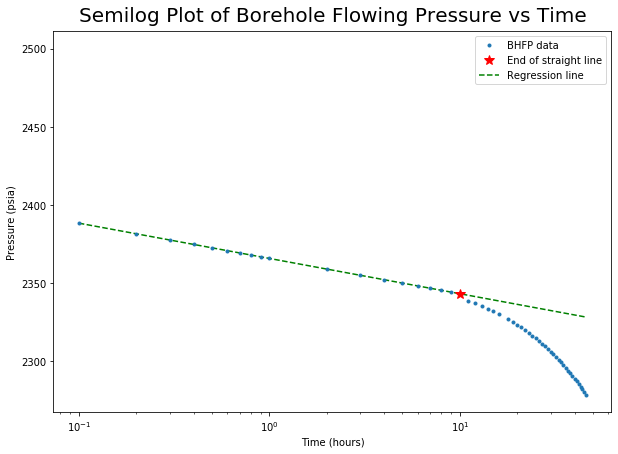

In [0]:
# plot regression line on semilog plot

# x_reg = dff1.t
# y_reg = m * x + c
# x_reg = np.log(np.array(df1.t))
x_reg = np.log(np.array(data_bhfp.t))
y_reg = m * x_reg + c

plt.figure(figsize=(10, 7))

# p3 = plt.semilogx(df1.t, y_reg, '--', color='g', ms=0.5)
p3 = plt.semilogx(data_bhfp.t, y_reg, '--', color='g', ms=0.5)

# plot borehole flowing pressure vs time
p1 = plt.semilogx(axisx, axisy, '.')

# plot the guessed 'end of straight' line for regression
p2 = plt.semilogx(data_bhfp.t[index], data_bhfp.p[index], '*', color='r', ms=10)
plt.legend((p1[0], p2[0], p3[0]), ('BHFP data', 'End of straight line', 'Regression line'))

plt.title('Semilog Plot of Borehole Flowing Pressure vs Time', size=20, pad=10)
plt.xlabel('Time (hours)'); plt.ylabel('Pressure (psia)')

The first task, determine reservoir permeability from the resulted slope `m` from regression.

In [0]:
"Task 1. determine permeability"

# known reservoir parameters

poro = 0.15
rw = 0.333 # in ft
h = 32 # in ft
qo = 1000 # in STB/d
swi = 0.25
ct = 12E-06 # in psi^-1
pi = 2500 # initial pressure in psia
mu_oil = 2 # in cP
Bo = 1.333 # in RB/STB

# conversion: NONE, all units already in oilfield units

# multiply m with ln(10)

m_cycle = m * np.log(10)
m_cycle # result in psi/cycle

# find k from Eq 7.10 (oilfield units)

k = - (162.6 * qo * Bo * mu_oil) / (m_cycle * h)
print("Permeability calculated from BHFP data:", k, "milidarcies")

Permeability calculated from BHFP data: 599.3469353431107 milidarcies


Second task, determine time to finite acting period. This is different to Example 6.1 in Unit 6 to calculate `t_finite_acting` previously because in Example 6.1, distance to outer boundary of reservoir (`re`) is known. Here in Example 7.1, `re` is not known, so `t_finite_acting` is barely determined by looking at the **semilog plot** above, where the pressure plots **start to deviate from straight line**.  

**Different from the book**, `t_finite_acting` is more likely to start at `t = 10` hours, exactly where we have guessed the *index of end of straight line* as `index = 19` before. 

So leaving out, `t_finite_acting = 10`

In [0]:
"Task 2. determine t finite acting from semilog plot"

t_finite_acting = 10

Third task, determine reservoir size `re`. There are 2 methods: one, presented in the book, using **normal plot of BHFP to time** and determine the slope. The another method, use **Eq 6.16** like in **Unit 6** since `t_finite_acting` has been approximated.  

In [0]:
"Task 3. determine reservoir size"

# method 1. analytical, use previously Eq 6.16

t_Dw = (t_finite_acting * 0.0002637 * k) / (poro * mu_oil * ct * (rw**2))

# solve re from t_Dw = 0.25 * r_eD**2

r_eD_square = 4 * t_Dw
re = rw * np.sqrt(r_eD_square)
print("Reservoir size from solving analytically Eq 6.16:", re, "ft")

Reservoir size from solving analytically Eq 6.16: 1325.174147255867 ft


Text(0, 0.5, 'Pressure (psia)')

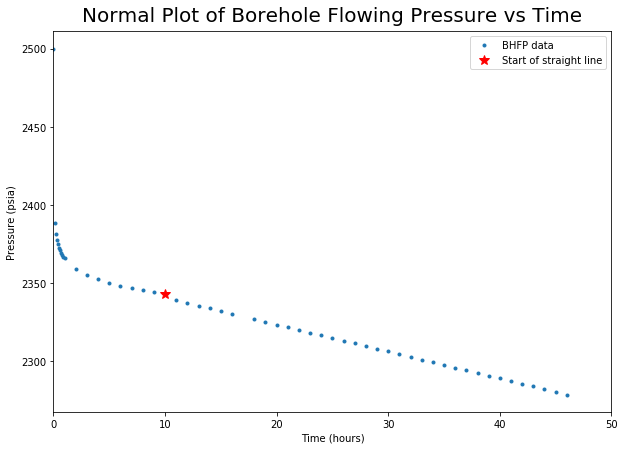

In [0]:
# find re from graphical (book's method), again guess for the straight line

"time when plot starts deviating equals to index at t_finite_acting, similar index to previous semilog plot"
index2 = index # similar to the index of semilog plot

# plot borehole flowing pressure vs time
plt.figure(figsize=(10, 7))
p1 = plt.plot(axisx, axisy, '.')

# plot the guessed 'end of straight' line for regression
p2 = plt.plot(data_bhfp.t[index2], data_bhfp.p[index2], '*', color='r', ms=10)
plt.legend((p1[0], p2[0]), ('BHFP data', 'Start of straight line'))

plt.xlim(0, 50)
plt.title('Normal Plot of Borehole Flowing Pressure vs Time', size=20, pad=10)
plt.xlabel('Time (hours)'); plt.ylabel('Pressure (psia)')

In [0]:
# cut dataframe from index of start of straight line to the last index
dff2 = data_bhfp.iloc[index2:, :]

x2 = np.array(dff2.t)
y2 = np.array(dff2.p)

def regression(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

c2, m2 = regression(x2,y2)
print("Slope of semilog plot of BHFP vs time:", m2)
print("Pressure intercept of semilog plot of BHFP vs time:", c2, "psia")

Slope of semilog plot of BHFP vs time: -1.7357010538030258
Pressure intercept of semilog plot of BHFP vs time: 2358.0966492729244 psia


Text(0, 0.5, 'Pressure (psia)')

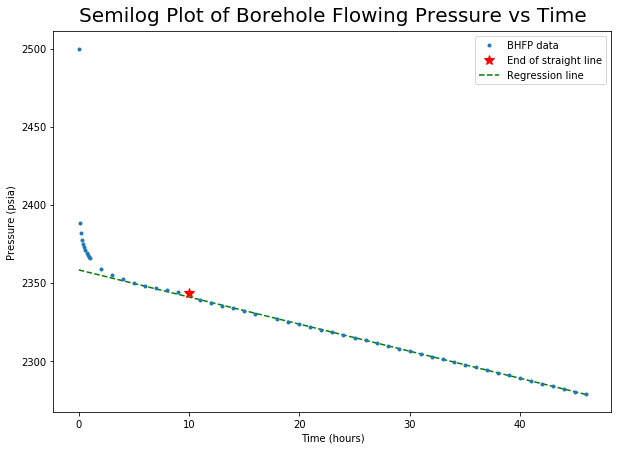

In [0]:
# plot regression line on plot

x_reg2 = np.array(data_bhfp.t)
y_reg2 = m2 * x_reg2 + c2

plt.figure(figsize=(10, 7))

p3 = plt.plot(data_bhfp.t, y_reg2, '--', color='g', ms=0.5)

# plot borehole flowing pressure vs time
p1 = plt.plot(axisx, axisy, '.')

# plot the guessed 'end of straight' line for regression
p2 = plt.plot(data_bhfp.t[index2], data_bhfp.p[index2], '*', color='r', ms=10)
plt.legend((p1[0], p2[0], p3[0]), ('BHFP data', 'End of straight line', 'Regression line'))

plt.title('Semilog Plot of Borehole Flowing Pressure vs Time', size=20, pad=10)
plt.xlabel('Time (hours)'); plt.ylabel('Pressure (psia)')

In [0]:
# re-arranging Eq 7.22

# m2 is not converted into psi/cycle, remains psi/hour

re2 = np.sqrt(-((0.07447 * qo * Bo) / (poro * h * ct * m2)))
print("Reservoir Size using Eq 7.22 graphical normal plot:", re2, "ft")

Reservoir Size using Eq 7.22 graphical normal plot: 996.4535215820936 ft


The fourth task, is to determine the **skin factor**, using Eq 7.12. 

In [0]:
"Task 4. calculate skin factor"

# determine first, the b1hr (pressure at 1 hour from regression line)
t1hr = 1 # time at 1 hour
b1hr = m2 * t1hr + c2 # m2 and c2 are slope and intercept of the second regression line from normal plot

# calculate skin factor, in oilfied formula

# m (slope) is m from semilog plot, m_cycle 

# first = (((pi - b1hr) / -m_cycle))
s = 1.1513 * (((pi - b1hr) / -m_cycle) - np.log10(k / (poro * mu_oil * ct * (rw**2))) + 3.2275)
print("Pressure intercept at 1 hour:", b1hr, "psia")
print("Skin factor using Eq 7.1:", s)

Pressure intercept at 1 hour: 2356.3609482191214 psia
Skin factor using Eq 7.1: 0.4675191449502658


Which is little different from the result of the book. But, it's fine. 

## **Chapter 7.3 Multirate Flow Tests**

### Example 7.2 Analysis of a Multirate Flow Test

Text(0, 0.5, 'Pressure (psia)')

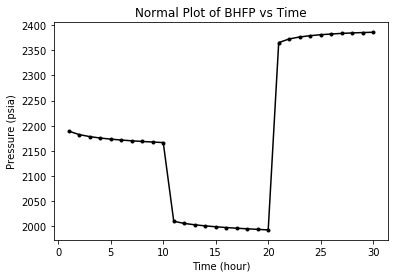

In [0]:
"Task. determine permeability k and skin factor s"

# known: flow is infinite in reservoir for full 30 hours, ETR (wellbore storage) period under 1 hour

poro = 0.15
rw = 4 # in inch
h = 32 # in ft
ct = 12E-06 # in psi^-1
pi = 2500 # initial pressure in psia
mu_oil = 2 # in cP
Bo = 1.333 # in RB/STB
re = np.Infinity # reservoir is infinity in size

# conversion
rw = rw * 0.08333 # convert from in to ft

time_change = [10, 20] # time when rate changes
q = [1000, 1500, 300]

data_multirate = pd.read_csv('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/data/Table 7.3-Reservoir Parameters and Pressure Data Example 7.2.csv')

# plot BHFP data vs time (normal plot)
plt.plot(data_multirate.t, data_multirate.p, '.-', color='black')
plt.title('Normal Plot of BHFP vs Time')
plt.xlabel('Time (hour)'); plt.ylabel('Pressure (psia)')

In [0]:
y_arr = []
Fp_arr = []

for i in range(len(data_multirate.t)):
  if data_multirate.t[i] <= time_change[0]:
    # first rate
    y = (pi - data_multirate.p[i]) / q[0] # the y axis (pi-pwf)/qn
    Fp = ((q[0] - 0) / q[0]) * np.log10(data_multirate.t[i] - 0) # the x axis, plotting function
  if data_multirate.t[i] > time_change[0] and data_multirate.t[i] <= time_change[1]:
    # second rate
    y = (pi - data_multirate.p[i]) / q[1] # the y axis (pi-pwf)/qn
    Fp = (((q[1] - q[0]) / q[1]) * np.log10(data_multirate.t[i] - time_change[0])) + (((q[0] - 0) / q[1]) * np.log10(data_multirate.t[i] - 0)) # the x axis, plotting function
  if data_multirate.t[i] > time_change[1]:
    # third rate
    y = (pi - data_multirate.p[i]) / q[2] # the y axis (pi-pwf)/qn
    Fp = (((q[2] - q[1]) / q[2]) * np.log10(data_multirate.t[i] - time_change[1])) + (((q[1] - q[0]) / q[2]) * np.log10(data_multirate.t[i] - time_change[0])) + (((q[0] - 0) / q[2]) * np.log10(data_multirate.t[i] - 0)) # the x axis, plotting function
  
  y_arr.append(float(y))
  Fp_arr.append(float(Fp))

result = pd.DataFrame({"Time (hour)": data_multirate.t, "Fp": Fp_arr, "y": y_arr})
result

,Time (hour),Fp,y
0,1,0.000000,0.310700
1,2,0.301030,0.317500
2,3,0.477121,0.321500
3,4,0.602060,0.324300
4,5,0.698970,0.326500
5,6,0.778151,0.328300
6,7,0.845098,0.329800
7,8,0.903090,0.331100
8,9,0.954243,0.332300
9,10,1.000000,0.333300


(0, 7)

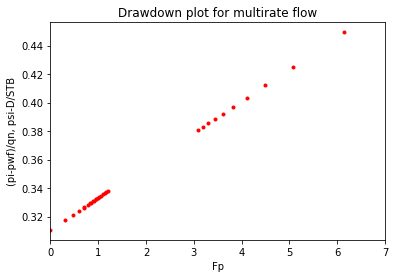

In [0]:
# plot result of y and Fp: drawdown plot

plt.plot(Fp_arr, y_arr, '.', color='r')
plt.title('Drawdown plot for multirate flow')
plt.xlabel('Fp'); plt.ylabel('(pi-pwf)/qn, psi-D/STB')
plt.xlim(0, 7)

In [0]:
# linear regression to find slope and intercept of a straight line

x3 = np.array(Fp_arr)
y3 = np.array(y_arr)

def regression(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

c3, m3 = regression(x3,y3)
print("Slope of drawdown plot:", m3)
print("Intercept of drawdown plot:", c3, "psi-D/STB")

Slope of drawdown plot: 0.022564511968585745
Intercept of drawdown plot: 0.3107394322295188 psi-D/STB


(0, 7)

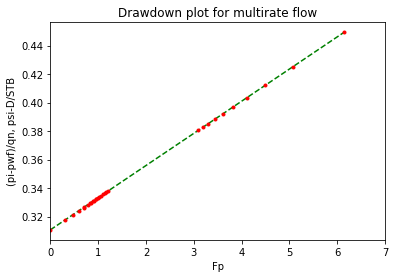

In [0]:
# plot regression line

x_reg3 = np.linspace(0, np.max(x3), 10)

y_reg3 = m3 * x_reg3 + c3

# plt.figure(figsize=(10, 7))

p1 = plt.plot(x_reg3, y_reg3, '--', color='g', ms=0.5)

# drawdown plot
plt.plot(Fp_arr, y_arr, '.', color='r')
plt.title('Drawdown plot for multirate flow')
plt.xlabel('Fp'); plt.ylabel('(pi-pwf)/qn, psi-D/STB')
plt.xlim(0, 7)

In [0]:
# calculate permeability k from slope m
k = (162.6 * Bo * mu_oil) / (m3 * h)

# calculate skin factor s from intercept c
s = 1.1513 * ((c3 / m3) - np.log10(k / (poro * mu_oil * ct * (rw**2))) + 3.2275)

print("Permeability from well-test analysis:", k, "mD")
print("Skin factor from well-test analysis:", s)

Permeability from well-test analysis: 600.3503430014156 mD
Skin factor from well-test analysis: 9.005787826564966


With the result of skin factor, `s = 9`, the well is said to be **severely damaged**.

## **Chapter 7.4 Constant Pressure Flow-Tests**

### Example 7.3 Analysis of a Constant-Pressure Well Test

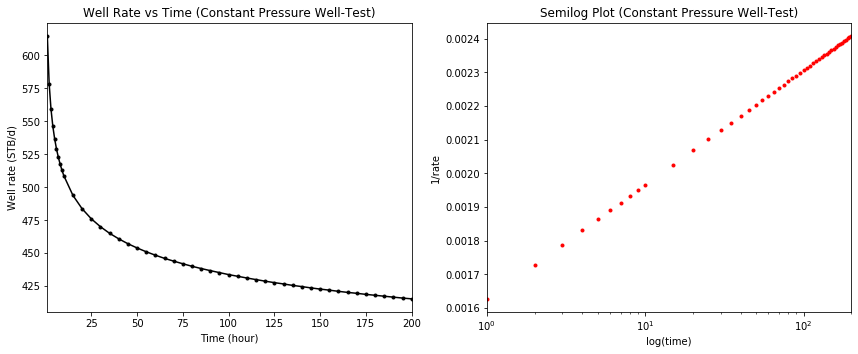

In [0]:
"Task. determine reservoir permeability k and skin factor s"

# known: no ETR (wellbore storage) period

poro = 0.2
rw = 0.5 # in ft
h = 45 # in ft
ct = 6E-06 # in psi^-1
pi = 2100 # initial reservoir pressure in psia
mu_oil = 4 # in cP
Bo = 1.33 # in RB/STB
pwf = 1500 # flowing pressure, constant, in psia

# conversion: NONE, already in oilfield units

constant_pressure = pd.read_csv('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/data/Table 7.5-Reservoir Parameters and Well-Rate Data Example 7.3.csv')

q_inverse = 1 / constant_pressure.q # as y axis for semilog plot

plt.figure(figsize=(12, 5))

# plot wellrate data vs time (normal plot)
plt.subplot(1, 2, 1)
plt.plot(constant_pressure.t, constant_pressure.q, '.-', color='black')
plt.title('Well Rate vs Time (Constant Pressure Well-Test)')
plt.xlabel('Time (hour)'); plt.ylabel('Well rate (STB/d)')
plt.xlim(1, 200)

# semilog plot of 1/q vs log(time)

plt.subplot(1, 2, 2)
plt.semilogx(constant_pressure.t, q_inverse, '.', color='r')
plt.title('Semilog Plot (Constant Pressure Well-Test)')
plt.xlabel('log(time)'); plt.ylabel('1/rate')
plt.xlim(1, 200)

plt.tight_layout(pad=1.0) # set distance between two plots

In [0]:
# linear regression to find slope and intercept of a straight line

x4 = np.log10(np.array(constant_pressure.t))
y4 = np.array(q_inverse)

def regression(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

c4, m4 = regression(x4,y4)
print("Slope of semilog plot:", m4)
print("Intercept of semilog plot:", c4, "(STB/d)^-1")

Slope of semilog plot: 0.0003396924088389693
Intercept of semilog plot: 0.0016262059170703601 (STB/d)^-1


In [0]:
# determine permeability
k = (162.6 * Bo * mu_oil) / (m4 * h * (pi - pwf))

# determine skin factor
b1hr = m4 * np.log10(1) + c4 # 1/q at 1 hour 
s = 1.1513 * ((b1hr / m4) - np.log10(k / (poro * mu_oil * ct * (rw**2))) + 3.2275)

print("Permeability from well-test analysis:", k, "mD")
print("Skin factor from well-test analysis:", s)

Permeability from well-test analysis: 94.31539059623171 mD
Skin factor from well-test analysis: 0.13745166063103187


## **Chapter 7.5 Constant-Rate Buildup Tests**

![shut in test](https://user-images.githubusercontent.com/51282928/75114146-24217400-5686-11ea-96ad-3f7328ab223c.JPG)

### Example 7.4 Analysis of a Constant-Rate Pressure-Buildup Well Test

Text(0, 0.5, 'Pressure (psia)')

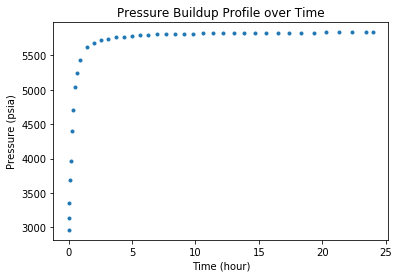

In [0]:
"Task. determine permeability k and skin factor s"

# known
poro = 0.22
rw = 0.4 # in ft
h = 86 # in ft
ct = 9E-06 # in psi^-1
pi = 2500 # initial pressure in psia
mu_oil = 1 # in cP
Bo = 1.421 # in RB/STB
re = np.Infinity # reservoir is infinity in size
q = 1000 # RB/D
pwf = 2962.4 # in psia, flowing pressure

# the well is flowed for 24 hours, then shut-in for another 24 hours (24-hour buildup)
tp = 24

data_buildup = pd.read_csv('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/data/Table 7.7-Reservoir Parameters and Pressure Data Example 7.4.csv')

plt.plot(data_buildup.t, data_buildup.p, '.')
plt.title('Pressure Buildup Profile over Time')
plt.xlabel('Time (hour)'); plt.ylabel('Pressure (psia)')

In [0]:
# calculate x Horner axis: log((tp + delta_t) / delta_t)

delta_t = data_buildup.t - data_buildup.t[0]
x_horner = np.log10((24 + delta_t) / delta_t)

horner = pd.DataFrame({"Time(hour)": data_buildup.t, "logtime": x_horner, "Shut-in pressure(psia)": data_buildup.p})
horner.head(20)

,Time(hour),logtime,Shut-in pressure(psia)
0,0.000,inf,2962.4
1,0.020,3.079543,3129.2
2,0.050,2.682145,3357.5
3,0.100,2.382017,3688.0
4,0.150,2.206826,3967.0
5,0.250,1.986772,4403.9
6,0.348,1.844884,4712.3
7,0.500,1.690196,5039.8
8,0.650,1.578904,5244.3
9,0.880,1.451368,5431.2


**Horner Plot** is plot of **shut-in pressure** `pws` versus **log time** `log((tp+delta_t)/delta_t)`. Visualize the Horner plot, find the linear region of the plot by zooming-in, and mark where the linear region **ends**, using the same method that we use before in Problem 7.1. 

(5500, 6000)

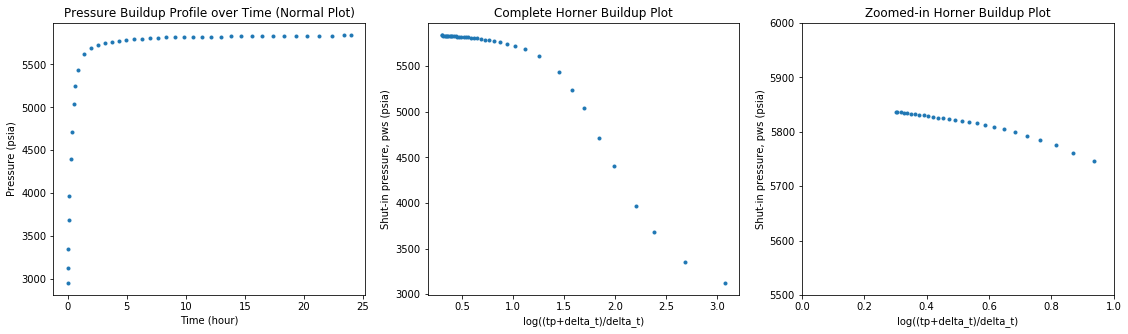

In [0]:
plt.figure(figsize=(19, 5))

p0 = plt.subplot(1, 3, 1)
p0 = plt.plot(data_buildup.t, data_buildup.p, '.')
p0 = plt.title('Pressure Buildup Profile over Time (Normal Plot)')
p0 = plt.xlabel('Time (hour)'); plt.ylabel('Pressure (psia)')

# Horner plot

p1 = plt.subplot(1, 3, 2)
p1 = plt.plot(x_horner, data_buildup.p, '.')
p1 = plt.title('Complete Horner Buildup Plot')
p1 = plt.xlabel('log((tp+delta_t)/delta_t)'); plt.ylabel('Shut-in pressure, pws (psia)')

p2 = plt.subplot(1, 3, 3)
p2 = plt.plot(x_horner, data_buildup.p, '.')
p2 = plt.title('Zoomed-in Horner Buildup Plot')
p2 = plt.xlabel('log((tp+delta_t)/delta_t)'); plt.ylabel('Shut-in pressure, pws (psia)')

"adjust the limits of x and y to zoom-in and find the linear region"
p2 = plt.xlim(0, 1); plt.ylim(5500, 6000)

**Figure 1** is the normal plot of shut-in pressure to time data (original data). **Figure 2** is the complete Horner Buildup plot from calculation. **Figure 3** is the zoomed-in Horner Plot. The zoomed-in plot (by adjusting the x and y limit) is to characterize the **linear region** of the plot when the **wellbore-storage period** ends. 

Next, we guess the **point when that wellbore-storage period ends**, by indexing (the same method we use previously in Problem 7.1), then plot it again on the three plots above.

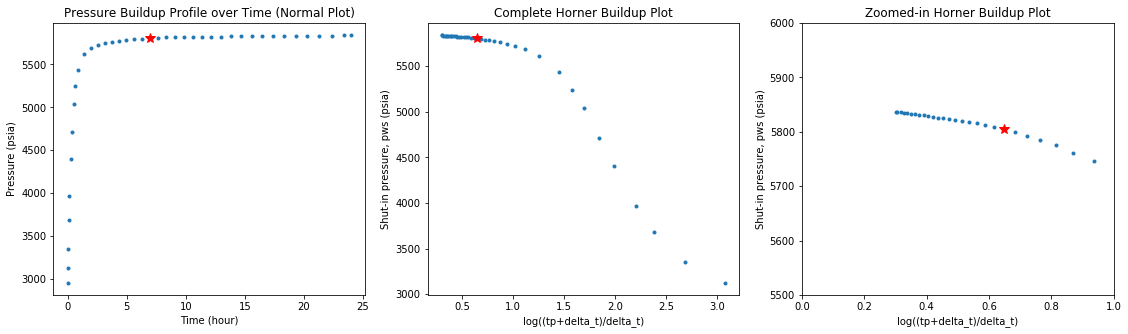

In [0]:
"guess time index in time data that when the linear region is ended. that time is the end of WELLBORE-STORAGE PERIOD"
index5 = 19 # continuously adjust this value until it reaches the point

# plot the guessed 'end of linear region

plt.figure(figsize=(19, 5))

p0 = plt.subplot(1, 3, 1)
p0 = plt.plot(data_buildup.t, data_buildup.p, '.')
p0 = plt.title('Pressure Buildup Profile over Time (Normal Plot)')
p0 = plt.xlabel('Time (hour)'); plt.ylabel('Pressure (psia)')

p0 = plt.plot(data_buildup.t[index5], data_buildup.p[index5], '*', color='r', ms=10)

# Horner plot

p1 = plt.subplot(1, 3, 2)
p1 = plt.plot(x_horner, data_buildup.p, '.')
p1 = plt.title('Complete Horner Buildup Plot')
p1 = plt.xlabel('log((tp+delta_t)/delta_t)'); plt.ylabel('Shut-in pressure, pws (psia)')

p1 = plt.plot(x_horner[index5], data_buildup.p[index5], '*', color='r', ms=10)

p2 = plt.subplot(1, 3, 3)
p2 = plt.plot(x_horner, data_buildup.p, '.')
p2 = plt.title('Zoomed-in Horner Buildup Plot')
p2 = plt.xlabel('log((tp+delta_t)/delta_t)'); plt.ylabel('Shut-in pressure, pws (psia)')
p2 = plt.xlim(0, 1); plt.ylim(5500, 6000)

p2 = plt.plot(x_horner[index5], data_buildup.p[index5], '*', color='r', ms=10)

In [0]:
print("End of wellbore-storage period occurs approximately at:", data_buildup.t[index5], "hour")

End of wellbore-storage period occurs approximately at: 6.965 hour


To avoid misleading, **Figure 1** represents **time axis**, the time goes **greater** over axis. Wellbore-storage period occurs from **time** 0 hour to 6.965 hours. After 6.965 hours, is the **linear region**. However, in **Fig 2** and **Fig 3**, they represent **logtime axis** which means, the time goes **smaller** over axis. So, it represents time from **greater** to **smaller**. Wellbore-storage period occurs from **logtime** 3 to 0.6.

### Regression of the linear region

So, we will **do regression** at the later part, from time 6.965 hours onward. Similar to method in **Example 7.1**, first the `horner` dataframe will be cut. 

In [0]:
# cut dataframe from index 0 to index of end of straight line
dfhorner = horner.iloc[index5:, :]

# linear regression to find slope and intercept of a straight line

x5 = dfhorner.iloc[:, 1]
y5 = dfhorner.iloc[:, 2]

def regression(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

c5, m5 = regression(x5,y5)
pi = c5 # initial pressure equals to intercept c5
print("Slope of linear-region Horner plot:", m5)
print("Intercept of linear-region Horner plot:", c5, "psia")
print("The initial reservoir pressure equals to the intercept:", pi, "psia")

Slope of linear-region Horner plot: -86.85944722538667
Intercept of linear-region Horner plot: 5863.734172839222 psia
The initial reservoir pressure equals to the intercept: 5863.734172839222 psia


The **initial reservoir pressure**, `pi` equals to the intercept `c5`, `pi = 5863.73 psia`. Plot the regression line

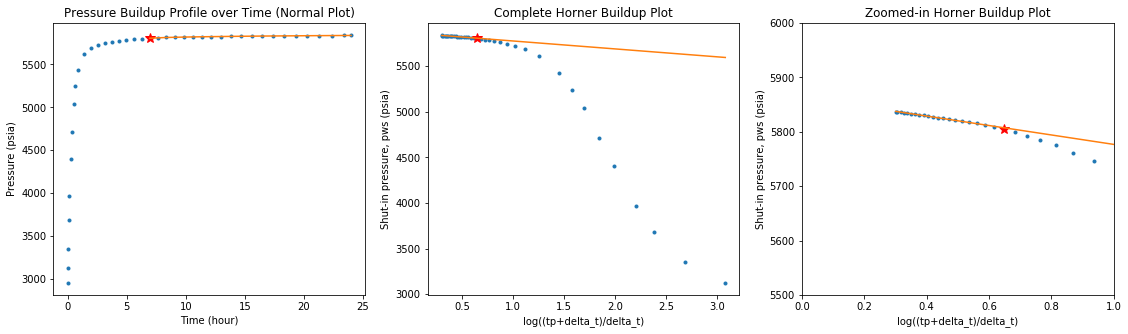

In [0]:
# drop the first row with time=0, because when log operation is underway, log(0) = indefinite
x_cut = horner.drop(horner.index[0])

x_reg5 = x_cut.iloc[:, 1]
y_reg5 = m5 * x_reg5 + c5

plt.figure(figsize=(19, 5))

# Normal plot

# cut dataframe from index to onward
normal = data_buildup.iloc[19:]
xnormal = normal.iloc[:, 0] # normal time axis
ynormal = normal.iloc[:, 1] # normal time axis

p0 = plt.subplot(1, 3, 1)
p0 = plt.plot(data_buildup.t, data_buildup.p, '.')
p0 = plt.title('Pressure Buildup Profile over Time (Normal Plot)')
p0 = plt.xlabel('Time (hour)'); plt.ylabel('Pressure (psia)')

p0 = plt.plot(data_buildup.t[index5], data_buildup.p[index5], '*', color='r', ms=10)

p0 = plt.plot(xnormal, ynormal)

# Horner plot

p1 = plt.subplot(1, 3, 2)
p1 = plt.plot(x_horner, data_buildup.p, '.')
p1 = plt.title('Complete Horner Buildup Plot')
p1 = plt.xlabel('log((tp+delta_t)/delta_t)'); plt.ylabel('Shut-in pressure, pws (psia)')

p1 = plt.plot(x_horner[index5], data_buildup.p[index5], '*', color='r', ms=10)

p1 = plt.plot(x_reg5, y_reg5) # regression

p2 = plt.subplot(1, 3, 3)
p2 = plt.plot(x_horner, data_buildup.p, '.')
p2 = plt.title('Zoomed-in Horner Buildup Plot')
p2 = plt.xlabel('log((tp+delta_t)/delta_t)'); plt.ylabel('Shut-in pressure, pws (psia)')
p2 = plt.xlim(0, 1); plt.ylim(5500, 6000)

p2 = plt.plot(x_horner[index5], data_buildup.p[index5], '*', color='r', ms=10)

p2 = plt.plot(x_reg5, y_reg5) # regression

Determine permeability `k` and skin factor `s`

In [0]:
# calculate permeability
k = - (162.6 * q * Bo * mu_oil) / (m5 * h)

# calculate skin factor

# determine b1hr: pressure value at t = 1 hour, in psia
b1hr = c5 + m5 * np.log10(tp + 1)

s = 1.1513 * (((pwf - b1hr) / m5) - np.log10(k / (poro * mu_oil * ct * (rw**2))) + 3.2275)
print("Skin factor:", s)

Skin factor: 31.364380401844183


Large skin factor indicates the **well is severely damaged**. Additional information that can be drawn from this: Calculate the **pressure drop** `delta_ps`, can use **Equation 7.3**, different from approach in the book.

In [0]:
# Calculate pressure drop due to well damage
delta_ps = ((141.2 * q * Bo * mu_oil) / (k * h)) * s
print("Pressure drop due to well skin:", delta_ps, "psia")

Pressure drop due to well skin: 2365.744990719904 psia


**Rephrase from book**: When the well was flowing before shut-in, total pressure drop was:

In [0]:
delta_p_shutin = pi - data_buildup.p[0]
print("Pressure drop before shut-in:", delta_p_shutin, "psia")

Pressure drop before shut-in: 2901.334172839222 psia


That means, **well skin / damage contributes to**:

In [0]:
wellskin_contribution = (delta_ps / delta_p_shutin) * 100
print("Well damage contribute to:", wellskin_contribution, "% of total pressure drop")

Well damage contribute to: 81.53990025922471 % of total pressure drop


... mostly of the pressure drop. **The formation itself contributes to**:

In [0]:
formation_drop = delta_p_shutin - delta_ps
formation_contribution = 100 - wellskin_contribution
print("Reservoir formation contribute to:", formation_drop, "psia of the total pressure drop, or in percent:", formation_contribution, "% of total pressure drop")

Reservoir formation contribute to: 535.5891821193181 psia of the total pressure drop, or in percent: 18.46009974077529 % of total pressure drop


# ***

In [0]:
# dataframe after 19th index, then the second row

a = horner.iloc[19:].iloc[:, 1]
a

19    0.647950
20    0.616411
21    0.587533
22    0.561029
23    0.536529
24    0.513799
25    0.492616
26    0.472821
27    0.454280
28    0.436875
29    0.420449
30    0.404959
31    0.390315
32    0.376437
33    0.363258
34    0.350744
35    0.338827
36    0.327470
37    0.316631
38    0.306281
39    0.301030
Name: logtime, dtype: float64